# Convolutional MNIST Classifier using Keras

### First we import the packages 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2' # Hide tensorflow suggestions
import numpy as np # linear algebra
from random import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D, MaxPooling2D

Using TensorFlow backend.


### Read the datasets

In [2]:
train_ds = pd.read_csv("./train.csv")
test_ds = pd.read_csv("./test.csv")

### Get x_train and y_train from datasets

In [3]:
y_train = pd.get_dummies(train_ds['label']).as_matrix()
x_train = train_ds
del x_train['label']
x_train = x_train.as_matrix().astype('float32')
x_test = test_ds.as_matrix().astype('float32')

### Normalize the input

In [4]:
x_train /= 255
x_test /= 255

### Reshape the images for the tensorflow backend

In [5]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

### Show some images

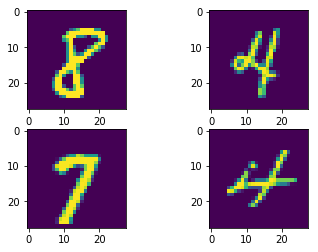

In [6]:
%matplotlib inline

for i in range(0, 4):
    plt.subplot(221 + i)
    plt.imshow(x_train[randint(1,len(x_train))].reshape(28,28))

## Create the Model

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 #        Hight,Width,Channels
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))   
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))   
model.add(Flatten(name='flatten'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

## Train the model

In [9]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
42000/42000 [==============================] - 338s - loss: 0.1917 - acc: 0.9421     

### Save the model

In [10]:
model.save('trained_model_keras_conv.h5')

## Create the predictions

In [11]:
id = np.arange(1,28001)
pred_classes = model.predict_classes(x_test)

submission = pd.DataFrame({
    "ImageId": id,
    "Label": pred_classes
    })

print(submission[0:10])

submission.to_csv('./predictions.csv', index=False)

28000/28000 [==============================] - 30s     